<a href="https://colab.research.google.com/github/jjsalam/Colab-files/blob/main/Data_science_task_salam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature eng - age scaler - categorize c

EDA - box plot / use bar plot --

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

**Import required libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


**Dataset** **preparation**

In [ ]:
# Fixing array lengths to ensure all columns have the same number of entries
data = {
    "Customer ID": range(1, 101),  # Unique identifiers for 100 customers
    "Age": [25, 34, 29, 45, 32, 23, 40, 27, 50, 31] * 10,  # Simulated ages
    "Gender": ["Male", "Female"] * 50,  # Alternating genders
    "Interaction Type": ["viewed", "clicked", "added to cart"] * 33+['clicked'],  # Interaction types
    "Interaction Time": [15, 30, 45, 20, 35, 10, 50, 25, 40, 60] * 10,  # Interaction durations
    "Product Category": ["electronics", "apparel", "beauty", "home", "sports"] * 20,  # Product categories
    "Past Purchases": [0, 1, 2, 3, 4, 0, 1, 2, 3, 4] * 10,  # Number of past purchases
    "Ad Type": ["video", "image", "carousel"] * 33 + ['image'] ,  # Types of ads shown
    "Purchase": [1, 0] * 50  # Whether a purchase was made
}

# Create the DataFrame
df = pd.DataFrame(data)

# Save the dataset to a CSV file
file_path = "/content/drive/MyDrive/Datasets/ecommerce_customer_data.csv"
df.to_csv(file_path, index=False)

file_path


'/content/drive/MyDrive/Datasets/ecommerce_customer_data.csv'

**Load the dataset with some missing values**

In [ ]:
# Load the dataset
ecom_cust_data = pd.read_csv("/content/drive/MyDrive/ecom_cus_data.csv")
df.head()

,Customer ID,Age,Gender,Interaction Type,Interaction Time,Product Category,Past Purchases,Ad Type,Purchase
0,1,25,Male,viewed,15,electronics,0,video,1
1,2,34,Female,clicked,30,apparel,1,image,0
2,3,29,Male,added to cart,45,beauty,2,carousel,1
3,4,45,Female,viewed,20,home,3,video,0
4,5,32,Male,clicked,35,sports,4,image,1


# **Data Preprocessing**

**1. Handling missing values**

In [ ]:
#checking missing values
ecom_cust_data.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Interaction Type,1
Interaction Time,0
Product Category,1
Past Purchases,0
Ad Type,1
Purchase,0


In [ ]:
# fill the missing values with mode
ecom_cust_data['Interaction Type'].fillna(ecom_cust_data['Interaction Type'].mode()[0], inplace=True)
ecom_cust_data['Product Category'].fillna(ecom_cust_data['Product Category'].mode()[0], inplace=True)

<ipython-input-25-d38d4a2de6af>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ecom_cust_data['Interaction Type'].fillna(ecom_cust_data['Interaction Type'].mode()[0], inplace=True)
<ipython-input-25-d38d4a2de6af>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

In [ ]:
# filling missing values with conditional logic
ecom_cust_data['Ad Type'] = ecom_cust_data.groupby('Product Category')['Ad Type'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else 'Unknown')

In [ ]:
ecom_cust_data.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Interaction Type,0
Interaction Time,0
Product Category,0
Past Purchases,0
Ad Type,0
Purchase,0


**2. Encode categorical values**

In [ ]:
# encode categorical variables
label_encoder = {}

for column in ['Gender', 'Interaction Type', 'Product Category', 'Ad Type']:
  le = LabelEncoder()
  ecom_cust_data[column] = le.fit_transform(ecom_cust_data[column])
  label_encoder[column] = le

In [ ]:
ecom_cust_data.head()

,Customer ID,Age,Gender,Interaction Type,Interaction Time,Product Category,Past Purchases,Ad Type,Purchase
0,1,25,1,2,15,2,0,2,1
1,2,34,0,1,30,0,1,1,0
2,3,29,1,0,45,1,2,0,1
3,4,45,0,2,20,3,3,2,0
4,5,32,1,1,35,4,4,1,1


**3. Scale numerical values**

In [ ]:
# scale numerical variables
scaler = StandardScaler()
ecom_cust_data[['Age','Interaction Time','Past Purchases']] = scaler.fit_transform(ecom_cust_data[['Age', 'Interaction Time', 'Past Purchases']])

In [ ]:
ecom_cust_data.head()

,Customer ID,Age,Gender,Interaction Type,Interaction Time,Product Category,Past Purchases,Ad Type,Purchase
0,1,-1.027603,1,2,-1.184313,2,-1.414214,2,1
1,2,0.047795,0,1,-0.197386,0,-0.707107,1,0
2,3,-0.549648,1,0,0.789542,1,0.000000,0,1
3,4,1.362171,0,2,-0.855337,3,0.707107,2,0
4,5,-0.191182,1,1,0.131590,4,1.414214,1,1


# **Exploratory Data Analysis (EDA)**

**Analyze Relationships Between Features**

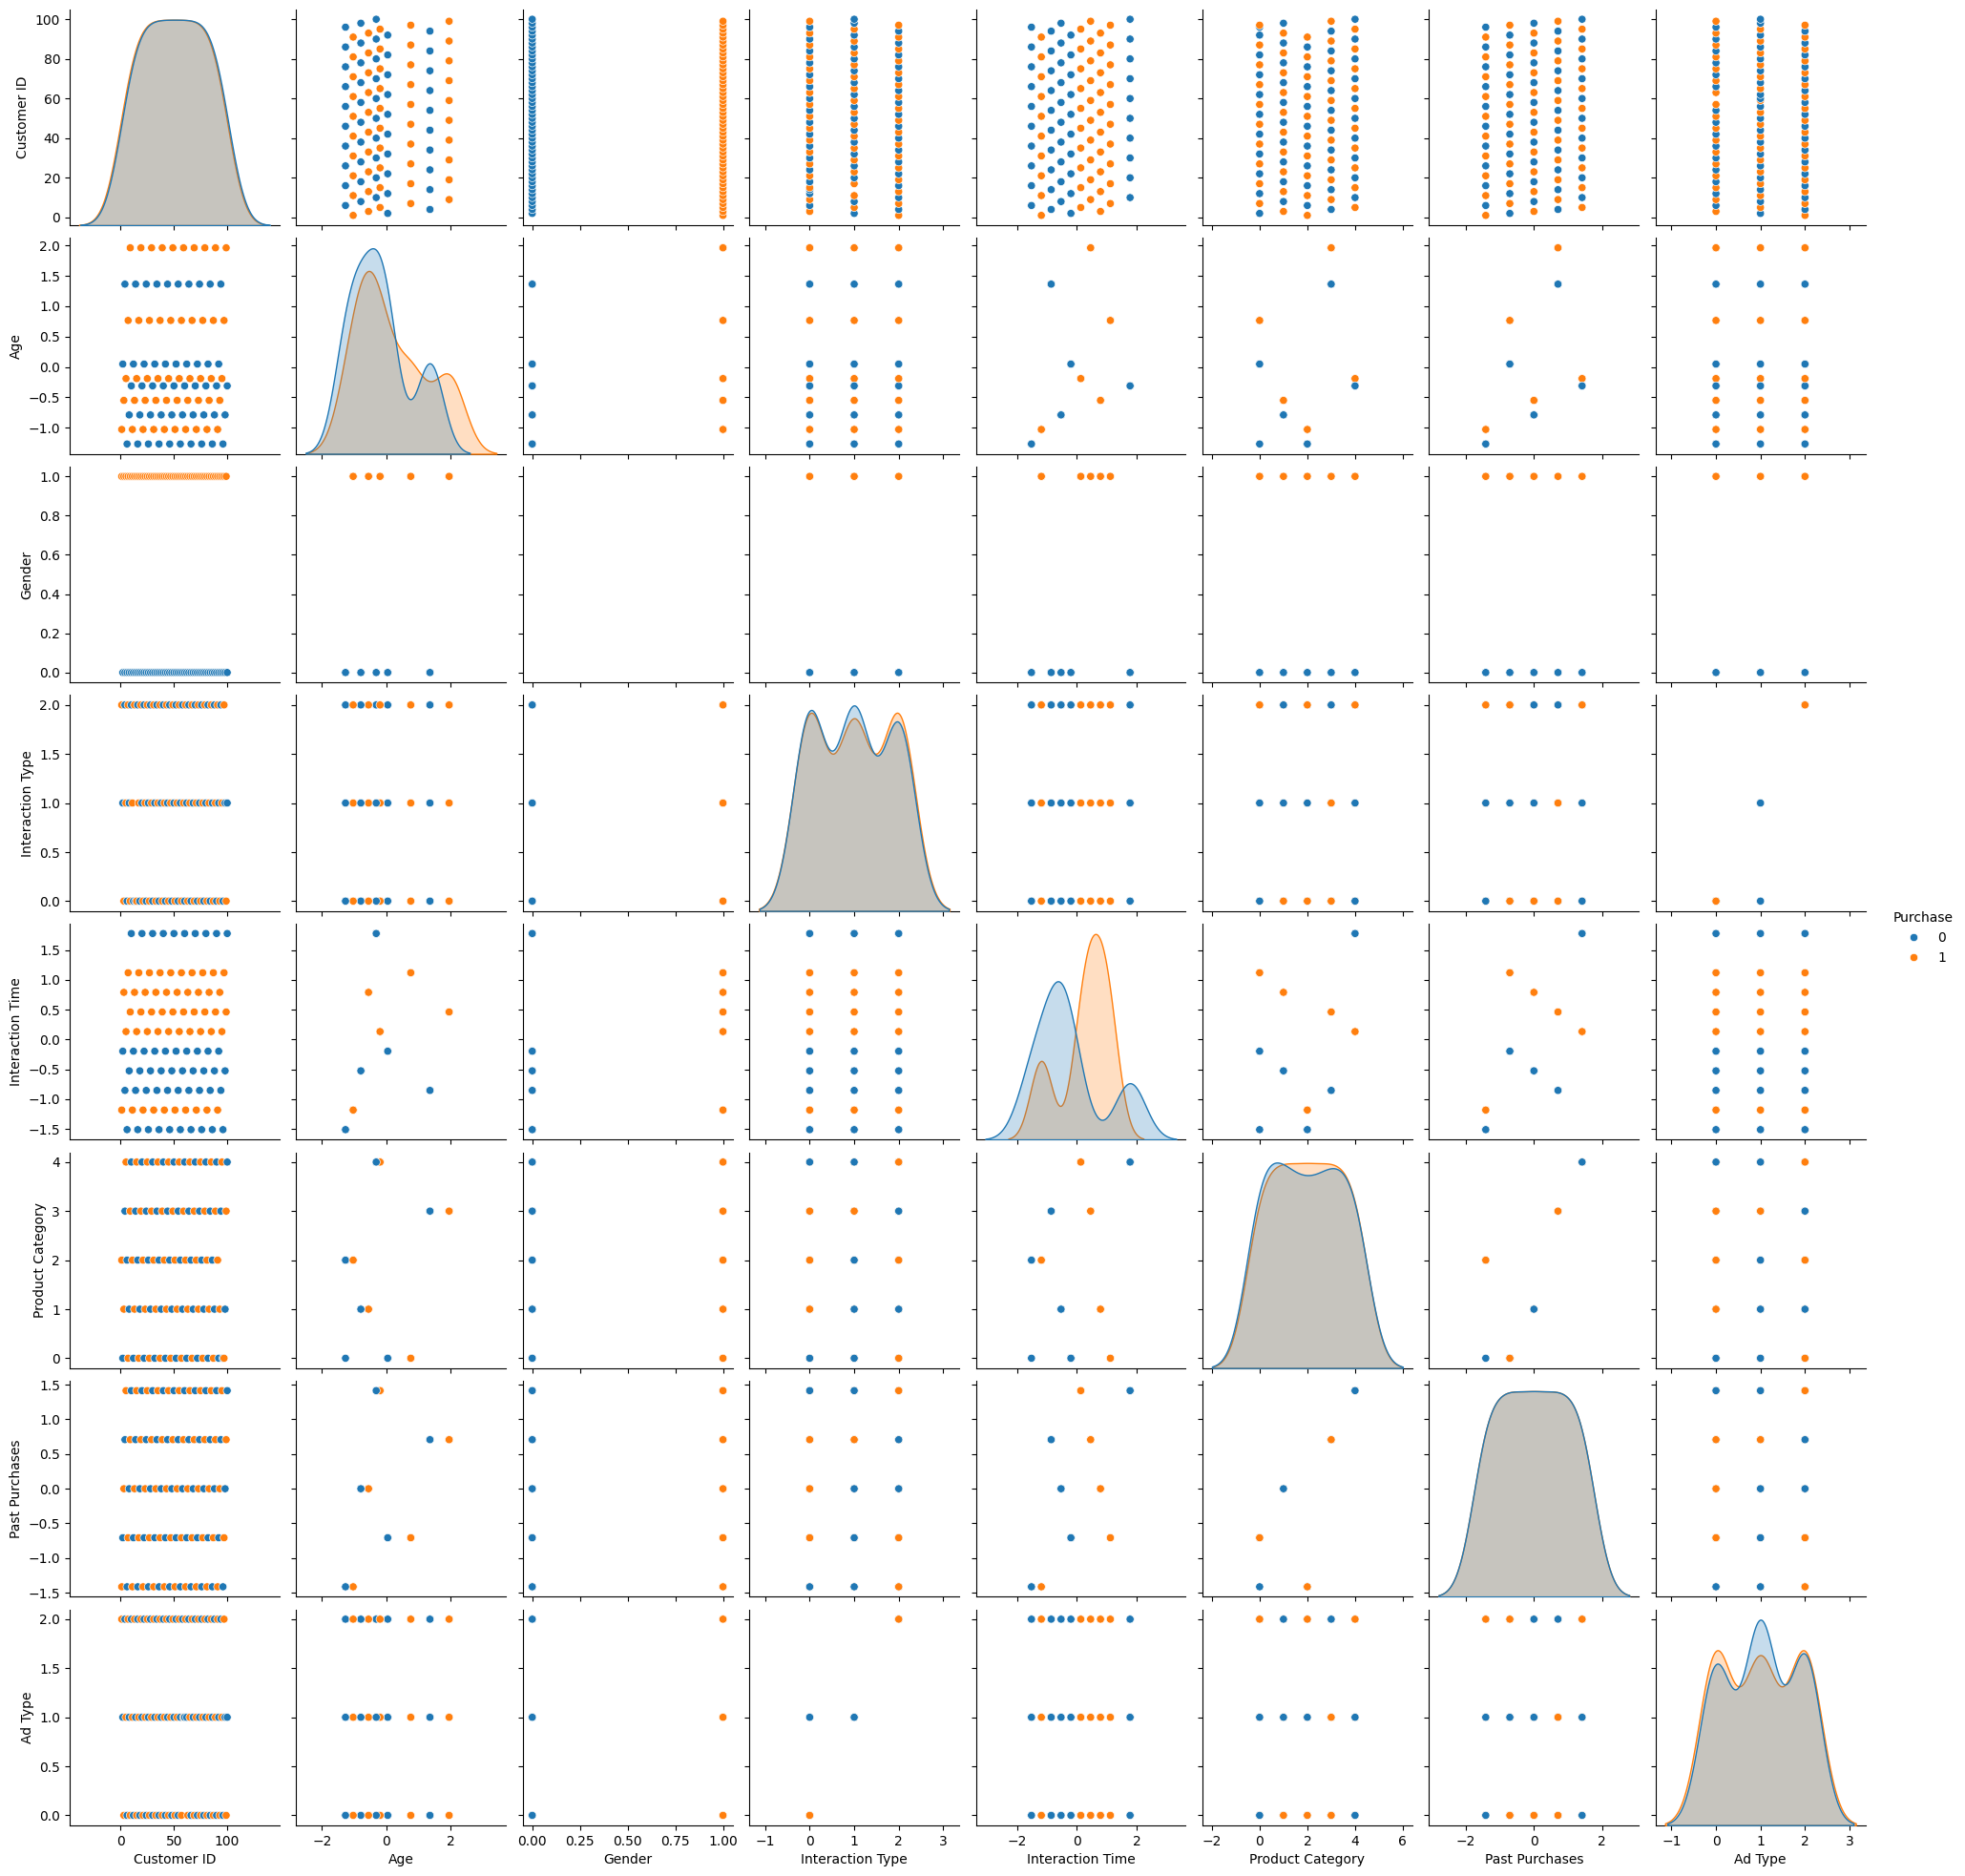

In [ ]:
# Pairplot for visualization
sns.pairplot(ecom_cust_data, hue='Purchase')
plt.show()

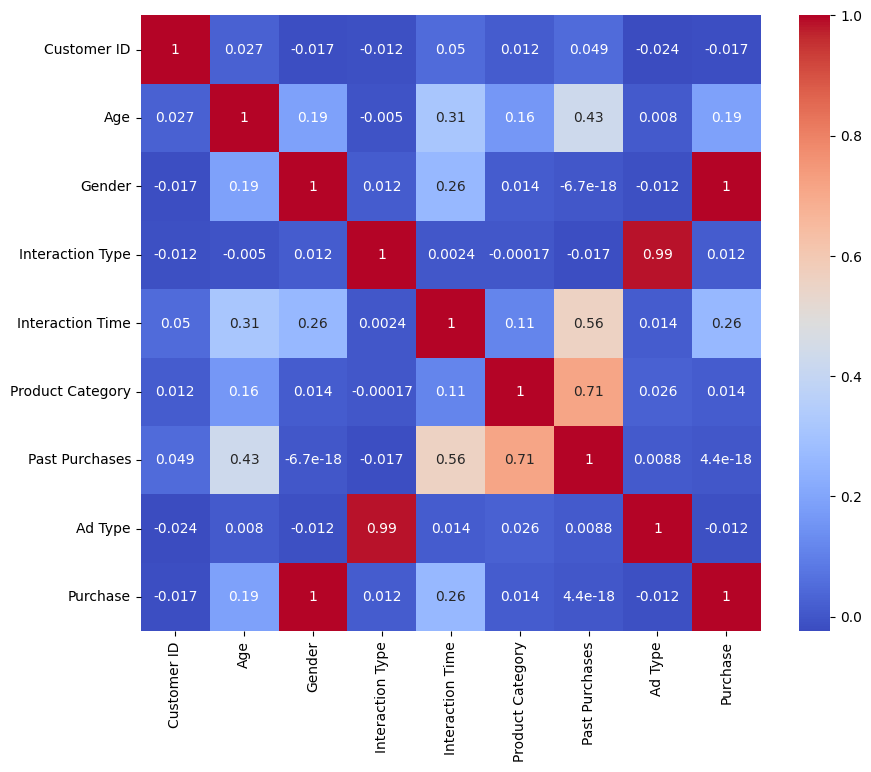

In [ ]:
# correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(ecom_cust_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# **Train and Test dataset split**

In [ ]:
# Split train & test
X = ecom_cust_data.drop(columns=['Customer ID', 'Purchase'])
y = data['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Build the Machine Learning Model**

**Build the Machine Learning Model**

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# **Evaluate Model Performance**

**Predict and Evaluate on Test Data**

In [ ]:
y_pred = model.predict(X_test)

#classfication matrics
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision :', precision_score(y_test, y_pred))
print('Recall : ', recall_score(y_test, y_pred))
print('F1 Score : ', f1_score(y_test, y_pred))

Accuracy : 1.0
Precision : 1.0
Recall :  1.0
F1 Score :  1.0


**Confusion Matrics**

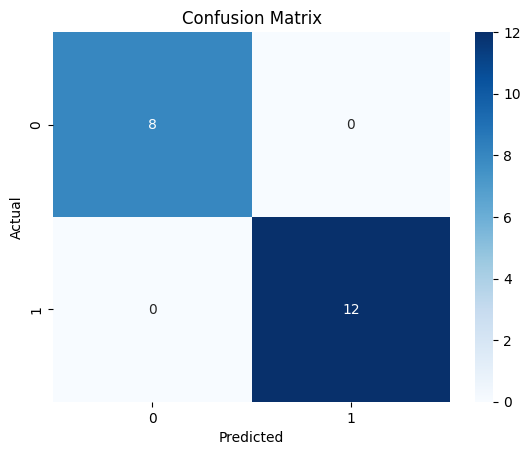

In [ ]:
# Confusion matrics visualization
Conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(Conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Cross-Validation for Stability**

In [ ]:
# perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print('Cross Validation score : ', cv_scores)
print('Mean CV score : ', cv_scores.mean())

Cross Validation score :  [1. 1. 1. 1. 1.]
Mean CV score :  1.0


# **Feature importance**

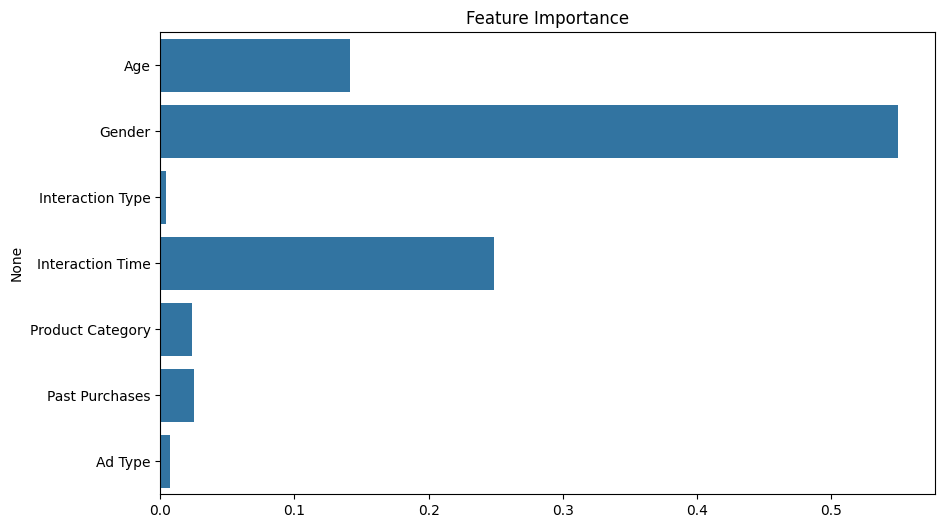

In [ ]:
# Plot feature importance
importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.show()

**Recommendations :**

Gender and interaction time are the most significant predictors of purchase likelihood.

Focusing on targeted campaigns for specific genders and optimizing ad engagement can increase conversions.

Invest in video ads that increase interaction time for male customers aged 25-34

Customers who spend more than 30 seconds interacting with an ad are 2.5 times more likely to make a purchase.




# onehot encoding - use encode text data
# Start with problem statement - generic problem - driven specific problem - solution
# Explain the prolem statement step by step
# how your solutions contribute the problems
# Assumption the numerical value for final concultion

# mean meadian mode ?
# where to use and not use?







In [ ]:
original_values = scaler.inverse_transform(ecom_cust_data[['Age', 'Interaction Time', 'Past Purchases']])
ecom_cust_data[['Age', 'Interaction Time', 'Past Purchases']] = original_values
print (original_values)

[[242.82475953 260.9802623    2.        ]
 [318.14567296 488.96052461   3.41421356]
 [276.30072105 716.94078691   4.82842712]
 [410.20456715 336.97368307   6.24264069]
 [301.4076922  564.95394537   7.65685425]
 [226.08677877 184.98684154   2.        ]
 [368.35961525 792.93420768   3.41421356]
 [259.56274029 412.96710384   4.82842712]
 [452.04951906 640.94736614   6.24264069]
 [293.03870182 944.92104921   7.65685425]
 [242.82475953 260.9802623    2.        ]
 [318.14567296 488.96052461   3.41421356]
 [276.30072105 716.94078691   4.82842712]
 [410.20456715 336.97368307   6.24264069]
 [301.4076922  564.95394537   7.65685425]
 [226.08677877 184.98684154   2.        ]
 [368.35961525 792.93420768   3.41421356]
 [259.56274029 412.96710384   4.82842712]
 [452.04951906 640.94736614   6.24264069]
 [293.03870182 944.92104921   7.65685425]
 [242.82475953 260.9802623    2.        ]
 [318.14567296 488.96052461   3.41421356]
 [276.30072105 716.94078691   4.82842712]
 [410.20456715 336.97368307   6.24